In [101]:
import numpy as np
import scipy as sp
import sys
import os
import SimpleITK as sitk
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import label
%matplotlib inline

In [102]:
data_dir = '/proj/NIRAL/users/hanwang/model_0208-pretraining/inference_9000_processed'
true_dir = '/proj/NIRAL/users/hanwang/pretraining-symmetric/'
output_dir = '/proj/NIRAL/users/siyangj/Han_0320/'

In [79]:
def Dice(pred,true,labels=[0,1,3,5,7,9,40]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        ret[i] = 2*float(np.logical_and(p,t).sum())/(p.sum()+t.sum())
    return ret

In [108]:
def clean_one_image(arr_original,arr_true):
    arr = deepcopy(arr_original)
    original_dice = Dice(arr,arr_true)
    
    for _l in [1,3,5,7,9,40]:
        carr = deepcopy(arr)
        carr[carr!=_l]=0
        labeled, ncomponents = label(carr)
        ls,cs = np.unique(labeled,return_counts=True)
        ls = ls[np.argsort(cs)[:-3]]
        
        for _i in ls:
            arr[labeled==_i]=0
    
    new_dice = Dice(arr,arr_true)
    
    return arr,original_dice,new_dice

In [123]:
def clean_all_images_in_path(pred_path,true_path,new_path):
    
    all_original_dice = []
    all_new_dice = []
    
    for f in os.listdir(pred_path):
        if f[-19:] != 'niftynet_out.nii.gz':
            continue
        print f
        ID = f[:10]
        im_pred = os.path.join(pred_path,f)
        im_true = os.path.join(true_path,'stx_noscale_'+ID+'_label.nrrd')
        im_new  = os.path.join(new_path, f)
        
        arr_pred = sitk.GetArrayFromImage(sitk.ReadImage(im_pred))
        arr_true = sitk.GetArrayFromImage(sitk.ReadImage(im_true))
        
        arr_new,original_dice,new_dice = clean_one_image(arr_pred,arr_true)
        
        all_original_dice += [original_dice,]
        all_new_dice += [new_dice,]
        
        sitk.WriteImage(sitk.GetImageFromArray(arr_new),im_new)
    
    all_original_dice = np.asarray(all_original_dice)
    all_new_dice = np.asarray(all_new_dice)
    
    return all_original_dice, all_new_dice

In [124]:
all_original_dice, all_new_dice = clean_all_images_in_path(data_dir,true_dir,output_dir)

413692_V12_niftynet_out.nii.gz
239554_V24_niftynet_out.nii.gz
589344_V12_niftynet_out.nii.gz
703249_V24_niftynet_out.nii.gz
942002_V12_niftynet_out.nii.gz
996243_V24_niftynet_out.nii.gz
692620_V15_niftynet_out.nii.gz
911817_V24_niftynet_out.nii.gz
581471_V24_niftynet_out.nii.gz
150649_V24_niftynet_out.nii.gz
481457_V12_niftynet_out.nii.gz
889945_V24_niftynet_out.nii.gz
988799_V12_niftynet_out.nii.gz
110940_V12_niftynet_out.nii.gz
240946_V24_niftynet_out.nii.gz
214769_V24_niftynet_out.nii.gz
822794_V24_niftynet_out.nii.gz
113320_V12_niftynet_out.nii.gz
927475_V12_niftynet_out.nii.gz
823104_V12_niftynet_out.nii.gz
842426_V12_niftynet_out.nii.gz
636881_V12_niftynet_out.nii.gz
328818_V12_niftynet_out.nii.gz
662147_V24_niftynet_out.nii.gz
973689_V24_niftynet_out.nii.gz
247315_V12_niftynet_out.nii.gz
479010_V12_niftynet_out.nii.gz
950194_V24_niftynet_out.nii.gz
321541_V12_niftynet_out.nii.gz
370683_V24_niftynet_out.nii.gz
429591_V12_niftynet_out.nii.gz
915717_V12_niftynet_out.nii.gz
972481_V

In [125]:
all_original_dice.mean(axis=0)

array([0.99706169, 0.81585003, 0.90542334, 0.8773491 , 0.87010008,
       0.90796067, 0.93566434])

In [126]:
all_new_dice.mean(axis=0)

array([0.99715079, 0.82912914, 0.91583854, 0.88115594, 0.87294022,
       0.90968484, 0.93591738])

In [127]:
(all_new_dice.mean(axis=0) - all_original_dice.mean(axis=0)) * 100

array([0.00891062, 1.32791141, 1.04151919, 0.38068378, 0.28401385,
       0.17241627, 0.02530456])

In [128]:
(all_new_dice-all_original_dice).std(axis=0)*100

array([0.00868804, 1.79430421, 1.22781335, 0.45956181, 1.20956163,
       0.40411376, 0.05657995])

In [129]:
(all_new_dice-all_original_dice).min(axis=0)*100

array([-0.01230187,  0.        ,  0.03367704, -0.00683398, -1.19328993,
       -0.31757571,  0.        ])

In [130]:
(all_new_dice-all_original_dice).max(axis=0)*100

array([ 0.0373419 , 11.70360791,  7.77521578,  2.33236854,  9.19999868,
        2.08374471,  0.28459627])

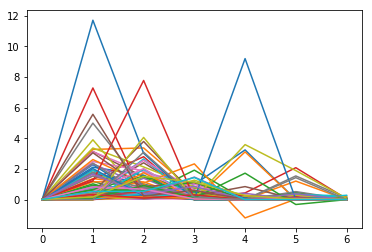

In [131]:
plt.plot((all_new_dice-all_original_dice).T * 100)